# Gold Price Prediction Project
# Random Forest Regression Model
### **YouTube Link**: https://youtu.be/9ffkBvh8PTQ?si=6ZzonObfrlLoLzb0
### **Practiced by**: Mariah Noelle Cornelio
### **Date**: October 11, 2024
This project is used to predict the price of gold using variables like stocks, previous gold price, silver price, and more. I am using this project to PRACTICE machine learning techniques. 
- All credit goes to @Siddhardhan on YouTube, amazing guy!
- The dataset used can be found here: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

## Importing and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # This is the regressor, there is also a classifier which we have done before
from sklearn import metrics

In [2]:
gold_df=pd.read_csv("gld_price_data.csv")
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Print the last rows of the dataframe
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_df.shape

(2290, 6)

In [5]:
gold_df.info()

# All numerical values (except date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Data viz
When doing a regression project, it is import to look at correlation because it tells us which column is related to another column

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_78275/3786939114.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_df.corr()


<Axes: >

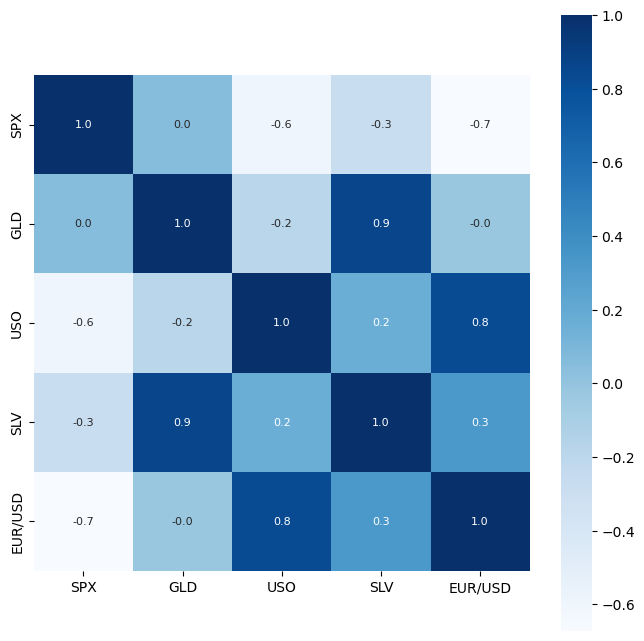

In [8]:
correlation=gold_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f",
           annot=True, annot_kws={"size":8}, cmap="Blues")

In [9]:
# Correlation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_78275/2342979511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df["GLD"], color="Pink")


<Axes: xlabel='GLD', ylabel='Density'>

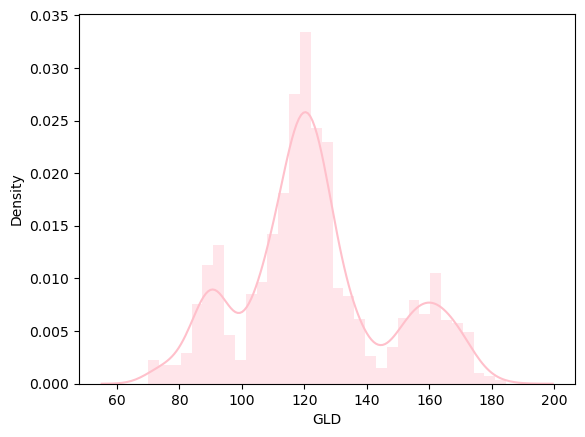

In [12]:
# Checking the distribution of GLD
sns.distplot(gold_df["GLD"], color="Pink")

## Splitting the features and target

In [13]:
X=gold_df.drop(columns=["GLD", "Date"], axis=1)
y=gold_df["GLD"]
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into training data and test data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Model training - Random Forest Regressor

In [16]:
regressor=RandomForestRegressor(n_estimators=100) # Default number
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model evaluation

In [17]:
# Prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction) # These are the values predicted by the model

[168.35929878  82.04429991 116.00200015 127.72150059 120.84190145
 154.72159772 150.48089824 125.9369006  117.49119868 126.06850071
 116.83800073 172.37790069 141.74199834 167.97589902 115.27010011
 117.95320041 138.75110307 170.06330096 159.91790373 155.41389939
 155.19210016 125.06620029 175.97360058 157.50630341 125.21270027
  93.65869974  77.57470023 120.8340999  119.11639915 167.48239987
  88.14850063 125.18439998  90.94510061 117.61999997 121.08699943
 135.8344007  115.705801   114.90850083 148.04680067 107.02140055
 104.1876026   87.33719819 126.53490031 117.78190008 152.18919894
 119.82279978 108.27760012 107.92039792  93.06540054 127.21349729
  75.01320018 113.65639962 121.24009981 111.11679915 118.79839879
 120.88939943 159.84110041 168.135401   147.06979704  85.83649874
  94.2584004   86.82279872  90.47320009 118.96530072 126.41620034
 127.63230003 168.52969951 122.27409946 117.30709888  98.53730025
 168.03450179 142.7396978  132.73050274 121.168602   121.05009935
 119.69120

In [18]:
# R squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score)

# Depends on your data. Since our data are around the 100s, then a .98 error is not a lot

R Squared Error:  0.9889957259528704


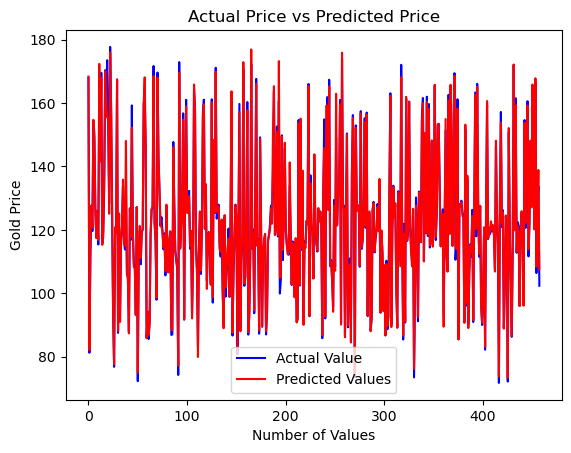

In [25]:
# Comparing the actual values and teh predicted values in a plot
y_test=list(y_test)
plt.plot(y_test, color="Blue", label="Actual Value")
plt.plot(test_data_prediction, color="Red", label="Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

# They are almost overlapping so this is really good!